# Red Neuronal MultiCapa

## Imports

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from jupyterthemes import jtplot
jtplot.style(grid=False)

from get_images_script import get_images

## Load data

- **Data Loading:**  
  The `get_images` function loads the MNIST data from the specified raw path. It returns:
  - `x_train_num` and `y_train_num`: Training images and labels.
  - `x_test_num` and `y_test_num`: Testing images and labels.
  
- **Reshaping and Data Type Conversion:**  
  The images are reshaped to 2D arrays where each image is flattened (28×28 → 784 pixels). The data is also converted to `np.float32` for numerical processing.
  
- **Splitting:**  
  The training set is split into:
  - **Training Set:** First 50,000 examples.
  - **Validation Set:** Remaining 10,000 examples.
  
- **Statistics:**  
  The mean, standard deviation, and minimum pixel value of `x_train` are printed. These values help us understand the original distribution of pixel intensities (typically between 0 and 255).


In [27]:
mnist_raw_path = 'MNIST_db/raw'

x_train_num, y_train_num, x_test_num, y_test_num = get_images(mnist_raw_path)

x_train = x_train_num[:50000].reshape(50000, -1).astype(np.float32)
y_train = y_train_num[:50000].reshape(50000, -1)

x_val = x_train_num[50000:].reshape(10000, -1).astype(np.float32)
y_val = y_train_num[50000:].reshape(10000, -1)

x_test = x_test_num.copy().reshape(10000, -1).astype(np.float32)
y_test = y_test_num.copy().reshape(10000, -1)

print(f"x_train.mean(): {x_train.mean()}")
print(f"x_train.std(): {x_train.std()}")
print(f"x_train.min(): {x_train.min()}")

x_train.mean(): 33.39515686035156
x_train.std(): 78.66619110107422
x_train.min(): 0.0


## Normalization


Normalization is crucial for the following reasons:

- **Improved Numerical Stability:** Neural networks converge faster when input features have a similar scale.
- **Efficient Training:** Centering data around 0 (mean ≈ 0) and scaling it to have a standard deviation of 1 helps in achieving a faster and more stable training process.
- **Avoiding Saturation:** Normalized inputs help prevent neurons from entering saturation regions of activation functions, which can impede learning.

- **Normalization Function:**  
  The function `normalise` takes the mean and standard deviation, and applies the transformation:

    
        x_normalized = (x - x_mean) / x_std
    

- **Parameter Calculation:**  
  The mean (`x_mean`) and standard deviation (`x_std`) are computed from the training set. These parameters are used to normalize all data splits, ensuring consistency.
- **Application:**  
  The normalization is applied to the training, validation, and test sets. After this process, the training data should have a mean close to 0 and a standard deviation close to 1.

In [28]:
def normalise(x_mean, x_std, x_data):
    return (x_data - x_mean) / x_std

x_mean = x_train.mean()
x_std = x_train.std()

x_train = normalise(x_mean, x_std, x_train)
x_val = normalise(x_mean, x_std, x_val)
x_test = normalise(x_mean, x_std, x_test)

print(f"Mean: {x_train.mean()}") # Nearly 0
print(f"Std: {x_train.std()}") # Nearly 1

Mean: -3.1638145969736797e-07
Std: 0.9999993443489075


## Show data

In [30]:
def plot_number(image):
    plt.figure(figsize=(5,5))
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()

The imagen showed is: 1


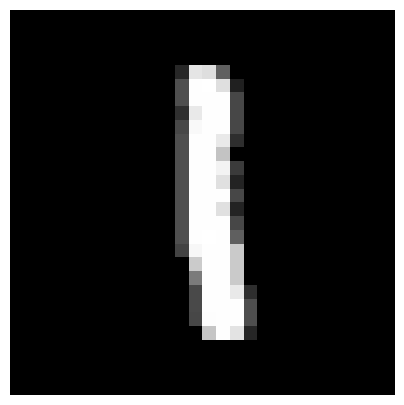

In [38]:
rnd_idx = np.random.randint(len(y_test))
print(f'The imagen showed is: {y_test[rnd_idx, 0]}')
plot_number(x_test_num[rnd_idx])

## Equations for Our Model
1. Linear Transformation: Calculate z^(1).  
2. Non-linear Activation: Apply ReLU to get a^(1).  
3. Output Layer: Calculate z^(2) and apply softmax to get y-hat.  
4. Loss Calculation: Compute -ln(y-hat^(i)) for each sample.  
5. Cost Function: Average the losses to get J(w,b).  
6. Optimization: Adjust w and b to minimize J(w,b).  

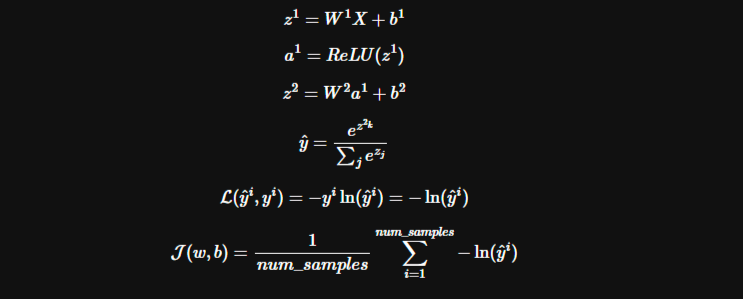

## Aditional Functions

### Mini-batches


In [39]:
def create_minibatches(mb_size, x, y, shuffle=True):
    assert x.shape[0] == y.shape[0] # Check if the number of examples is the same
    total_data = x.shape[0]
    
    if shuffle:
        # Shuffle the data
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]
        
    return ((x[i:i+mb_size]) for i in range(0, total_data, mb_size))

## Classes

### Linear Class